# Preprocessing

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

In [2]:
# read in data, from pybaseball statcast()
baseball_24 = pd.read_csv('baseball_2024.csv')

In [3]:
# remove columns not being included in our analysis, the removed data is not a pre pitch factor, 
# cannot be controlled by the pitcher/pitching team pre-pitch, should not impact the pitch outcome, or is just bad data

cols_to_remove = ['on_3b','on_2b','on_1b','inning_topbot', 'if_fielding_alignment','of_fielding_alignment','batter','game_date', 'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'des', 'game_type', 'home_team', 'away_team','type', 'hit_location', 'bb_type', 'game_year', 'hc_x', 'hc_y', 'tfs_deprecated', 'tfs_zulu_deprecated','umpire', 'sv_id','hit_distance_sc','launch_speed', 'launch_angle', 'game_pk', 'fielder_2', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 'woba_value', 'woba_denom', 'babip_value', 'iso_value', 'launch_speed_angle', 'home_score', 'away_score', 'bat_score', 'fld_score', 'post_away_score', 'post_home_score', 'post_bat_score', 'post_fld_score', 'delta_home_win_exp', 'delta_run_exp','bat_speed','swing_length','estimated_slg_using_speedangle','delta_pitcher_run_exp','hyper_speed','home_score_diff','bat_score_diff','home_win_exp','bat_win_exp', 'age_pit_legacy', 'age_bat_legacy','age_pit','age_bat', 'n_thruorder_pitcher', 'n_priorpa_thisgame_player_at_bat','batter_days_since_prev_game','pitcher_days_until_next_game','batter_days_until_next_game']
baseball_24 = baseball_24.drop(columns=cols_to_remove)

In [4]:
print(baseball_24['description'].unique())
print(baseball_24['events'].unique())

['swinging_strike_blocked' 'swinging_strike' 'ball' 'foul' 'called_strike'
 'hit_into_play' 'blocked_ball' 'foul_tip' 'foul_bunt' 'hit_by_pitch'
 'missed_bunt' 'bunt_foul_tip' 'pitchout']
['strikeout' nan 'field_out' 'walk' 'single' 'double' 'sac_fly'
 'catcher_interf' 'force_out' 'hit_by_pitch' 'fielders_choice'
 'field_error' 'home_run' 'grounded_into_double_play' 'double_play'
 'strikeout_double_play' 'fielders_choice_out' 'truncated_pa' 'sac_bunt'
 'triple' 'triple_play' 'sac_fly_double_play']


In [5]:
baseball_24.loc[baseball_24['events'].isnull(),'events'] = baseball_24['description']

In [6]:
print(baseball_24['events'].unique())

['strikeout' 'swinging_strike' 'ball' 'foul' 'called_strike' 'field_out'
 'blocked_ball' 'walk' 'single' 'double' 'sac_fly' 'catcher_interf'
 'force_out' 'foul_bunt' 'hit_by_pitch' 'foul_tip' 'fielders_choice'
 'field_error' 'home_run' 'grounded_into_double_play' 'double_play'
 'swinging_strike_blocked' 'strikeout_double_play' 'fielders_choice_out'
 'truncated_pa' 'sac_bunt' 'triple' 'missed_bunt' 'bunt_foul_tip'
 'pitchout' 'triple_play' 'hit_into_play' 'sac_fly_double_play']


In [7]:
baseball_24.loc[baseball_24['events']=='truncated_pa','events'] = baseball_24['description']
print(baseball_24['events'].unique())

['strikeout' 'swinging_strike' 'ball' 'foul' 'called_strike' 'field_out'
 'blocked_ball' 'walk' 'single' 'double' 'sac_fly' 'catcher_interf'
 'force_out' 'foul_bunt' 'hit_by_pitch' 'foul_tip' 'fielders_choice'
 'field_error' 'home_run' 'grounded_into_double_play' 'double_play'
 'swinging_strike_blocked' 'strikeout_double_play' 'fielders_choice_out'
 'sac_bunt' 'triple' 'missed_bunt' 'bunt_foul_tip' 'pitchout'
 'triple_play' 'hit_into_play' 'sac_fly_double_play']


strikes: strikeout, swinging_strike, foul, called_strike, foul_bunt, foul_tip, swinging_strike_blocked, strikeout_double_play, missed_bunt, bunt_foul_tip
ball: ball, blocked_ball, hit_by_pitch, walk
out: field_out, force_out, fielders_choice, field_error, grounded_into_double_play, double_play, fielders_choice_out, triple_play, hit_into_play
hit: single, double, sac_fly, home_run, sac_bunt, triple, sac_fly_double_play
remove: catcher_interf, pitchout

In [8]:
baseball_24.loc[baseball_24['events']=='strikeout','events'] = 'strike'
baseball_24.loc[baseball_24['events']=='swinging_strike','events'] = 'strike'
baseball_24.loc[baseball_24['events']=='foul','events'] = 'strike'
baseball_24.loc[baseball_24['events']=='called_strike','events'] = 'strike'
baseball_24.loc[baseball_24['events']=='foul_bunt','events'] = 'strike'
baseball_24.loc[baseball_24['events']=='foul_tip','events'] = 'strike'
baseball_24.loc[baseball_24['events']=='swinging_strike_blocked','events'] = 'strike'
baseball_24.loc[baseball_24['events']=='strikeout_double_play','events'] = 'strike'
baseball_24.loc[baseball_24['events']=='missed_bunt','events'] = 'strike'
baseball_24.loc[baseball_24['events']=='bunt_foul_tip','events'] = 'strike'
baseball_24.loc[baseball_24['events']=='ball','events'] = 'ball'
baseball_24.loc[baseball_24['events']=='blocked_ball','events'] = 'ball'
baseball_24.loc[baseball_24['events']=='hit_by_pitch','events'] = 'ball'
baseball_24.loc[baseball_24['events']=='walk','events'] = 'ball'
baseball_24.loc[baseball_24['events']=='field_out','events'] = 'out'
baseball_24.loc[baseball_24['events']=='force_out','events'] = 'out'
baseball_24.loc[baseball_24['events']=='fielders_choice','events'] = 'out'
baseball_24.loc[baseball_24['events']=='field_error','events'] = 'out'
baseball_24.loc[baseball_24['events']=='grounded_into_double_play','events'] = 'out'
baseball_24.loc[baseball_24['events']=='double_play','events'] = 'out'
baseball_24.loc[baseball_24['events']=='fielders_choice_out','events'] = 'out'
baseball_24.loc[baseball_24['events']=='triple_play','events'] = 'out'
baseball_24.loc[baseball_24['events']=='hit_into_play','events'] = 'out'
baseball_24.loc[baseball_24['events']=='single','events'] = 'hit'
baseball_24.loc[baseball_24['events']=='double','events'] = 'hit'
baseball_24.loc[baseball_24['events']=='sac_fly','events'] = 'hit'
baseball_24.loc[baseball_24['events']=='home_run','events'] = 'hit'
baseball_24.loc[baseball_24['events']=='sac_bunt','events'] = 'hit'
baseball_24.loc[baseball_24['events']=='triple','events'] = 'hit'
baseball_24.loc[baseball_24['events']=='sac_fly_double_play','events'] = 'hit'
baseball_24 = baseball_24[(baseball_24['events'] != 'catcher_interf') & (baseball_24['events'] != 'pitchout')]

In [9]:
baseball_24 = pd.concat([baseball_24, pd.get_dummies(baseball_24['pitch_type'],dtype=int), pd.get_dummies(baseball_24['stand'],dtype=int, prefix='bat'), pd.get_dummies(baseball_24['p_throws'],dtype=int, prefix='pitch')],axis=1)

In [10]:
pitcher_names = baseball_24[['player_name','pitcher']]
baseball_24 = baseball_24.drop(columns=['pitch_type','stand','p_throws','description', 'pitch_name', 'player_name'])

In [11]:
test_pitchers = np.random.choice(baseball_24['pitcher'].unique(), round(len(baseball_24['pitcher'].unique())/10))

In [12]:
test_df = baseball_24[baseball_24['pitcher'].isin(test_pitchers)].dropna().reset_index()
train_df = baseball_24[baseball_24['pitcher'].isin(test_pitchers)==False].dropna().reset_index()

In [13]:
y_train = train_df['events']
y_test = test_df['events']
pitcher_train = train_df['pitcher']
pitcher_test = test_df['pitcher']
X_train = train_df.drop(columns=['events', 'pitcher'])
X_test = test_df.drop(columns=['events', 'pitcher'])

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [15]:
y_dict_map = {'strike':1, 'ball':0, 'out':1, 'hit':0}
y_train = y_train.map(y_dict_map).to_numpy()
#y_train = pd.get_dummies(y_train).to_numpy()
y_test = y_test.map(y_dict_map).to_numpy()
#y_test = pd.get_dummies(y_test).to_numpy()
X_train_scaled = np.column_stack((np.ones(len(X_train_scaled)), X_train_scaled))
X_test_scaled = np.column_stack((np.ones(len(X_test_scaled)), X_test_scaled))

# MLP

In [16]:
eta = 0.1

# the rows of W1 correspond to the columns of X, the columns to the number of hidden nodes
# the rows of W2 correspond to the number of hidden nodes, the columns to the dimension of the output y
W1 = np.random.randn(54,26)
W2 = np.random.randn(26,1)

In [17]:
# uses the relu activation function for h and the sigmoid activation function for the output
def f(x):
    h = np.maximum(0, W1.T.dot(x))
    return 1 / (1 + np.exp(-W2.T.dot(h)))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [18]:
# keep track of gradient descent errors
# to monitor convergence
errors = []
epochs = 40
n = X_train_scaled.shape[0]
d = X_train_scaled.shape[1]
for epoch in range(epochs):
    dW2 = 0
    for i, j in enumerate(y_train):
        x = np.reshape(X_train_scaled[i], (d,1))
        h = np.maximum(0, W1.T.dot(x))
        dW2 += (1/n) * (-y_train[i]/f(x)+(1-y_train[i])/(1-f(x))) * f(x)*(1-f(x))

    W2 = W2 - eta * dW2
    
    dW1 = 0
    for i, j in enumerate(y_train):
        x = np.reshape(X_train_scaled[i], (d,1))
        h = np.maximum(0, W1.T.dot(x))
        mat1 = np.heaviside(h, 0)

        dW1 += (1/n) * (-y_train[i]/f(x)+(1-y_train[i])/(1-f(x))) * np.kron((f(x)*(1-f(x)) * mat1).T, x)

    W1 = W1 - eta * dW1
    print(dW1)
    e = -(1/n) * np.sum(y_train * np.log(f(X_train_scaled.T)) + (1-y_train) * np.log(1-f(X_train_scaled.T)))
    errors.append(e)

[[ 2.40864522e-05  4.04231659e-01  2.24484344e-02 ...  2.76659779e-02
   6.94897697e-02  4.02486765e-01]
 [ 3.90025891e-06  1.96956463e-01  7.53286704e-03 ...  1.30443463e-02
   4.32807322e-02  1.96452941e-01]
 [ 2.08277061e-05  3.11566821e-01  1.65907733e-02 ...  1.97019918e-02
   5.51410555e-02  3.10391613e-01]
 ...
 [ 1.76625636e-05  2.25445920e-01  1.94702958e-02 ...  1.54753800e-02
   4.56008895e-02  2.23704166e-01]
 [ 0.00000000e+00  1.07715388e-01  1.90555274e-02 ...  4.35990712e-03
  -1.47841338e-09  1.06875663e-01]
 [ 2.40864522e-05  2.96516270e-01  3.39290702e-03 ...  2.33060708e-02
   6.94897711e-02  2.95611102e-01]]
[[ 2.40659506e-05  3.84440626e-01  1.98331957e-02 ...  2.39261592e-02
   5.58403499e-02  3.81270355e-01]
 [ 3.89919185e-06  1.87113350e-01  6.58545015e-03 ...  1.12780369e-02
   3.55116798e-02  1.86126148e-01]
 [ 2.08095533e-05  2.97239445e-01  1.47193977e-02 ...  1.70175440e-02
   4.46882262e-02  2.95046258e-01]
 ...
 [ 1.76430553e-05  2.12741446e-01  1.7032828

[[ 1.95447925e-05  1.86540993e-02 -1.66357144e-04 ... -1.30097420e-02
  -3.14840445e-02  4.40651087e-02]
 [ 3.58048446e-06  1.06162077e-02 -2.20508300e-04 ... -6.05112863e-03
  -1.67537446e-02  2.09031675e-02]
 [ 1.68005554e-05  2.17083313e-02  1.78886547e-04 ... -9.43345683e-03
  -2.28897118e-02  3.88330800e-02]
 ...
 [ 1.48884622e-05  1.80557947e-02 -9.57935081e-04 ... -4.76067308e-03
  -1.50804777e-02  3.87133728e-02]
 [ 0.00000000e+00  4.72358415e-02  1.49670383e-03 ...  1.86514791e-03
  -2.30272861e-07  4.36288390e-02]
 [ 1.95447925e-05 -2.85817422e-02 -1.66306097e-03 ... -1.48748899e-02
  -3.14838142e-02  4.36269654e-04]]
[[ 1.88495695e-05 -1.66994939e-03 -9.81226593e-04 ... -1.44597237e-02
  -3.65035724e-02  2.87937890e-02]
 [ 3.53147820e-06  7.47866772e-04 -4.84576092e-04 ... -6.74407381e-03
  -1.97209266e-02  1.32392029e-02]
 [ 1.61886831e-05  5.80673237e-03 -4.19853349e-04 ... -1.04689812e-02
  -2.68764804e-02  2.66532508e-02]
 ...
 [ 1.43138406e-05  6.61264260e-03 -1.6743247

[[ 1.00564518e-05 -1.14470421e-01 -6.53381974e-03 ... -2.62889733e-02
  -1.10132695e-01 -6.65072406e-02]
 [ 2.93109648e-06 -5.73343263e-02 -2.31418457e-03 ... -1.25410467e-02
  -5.76538665e-02 -3.65374530e-02]
 [ 8.50592150e-06 -8.47883389e-02 -4.59759620e-03 ... -1.90370967e-02
  -8.50065919e-02 -5.06145067e-02]
 ...
 [ 6.38074377e-06 -6.76962130e-02 -7.02474489e-03 ... -1.27828047e-02
  -6.37923072e-02 -2.23578153e-02]
 [ 0.00000000e+00  2.57812902e-02 -4.28296637e-03 ...  7.56548744e-04
  -1.67604138e-05  3.04008684e-02]
 [ 1.00564518e-05 -1.40251711e-01 -2.25085337e-03 ... -2.70455220e-02
  -1.10115934e-01 -9.69081090e-02]]
[[ 9.92891651e-06 -1.07908467e-01 -6.49869438e-03 ... -2.66117160e-02
  -1.12226716e-01 -6.38588626e-02]
 [ 2.92718927e-06 -5.47770026e-02 -2.32387929e-03 ... -1.27494121e-02
  -5.83300314e-02 -3.56180076e-02]
 [ 8.39898629e-06 -7.99424951e-02 -4.57981860e-03 ... -1.92861218e-02
  -8.65715537e-02 -4.86421341e-02]
 ...
 [ 6.11409946e-06 -6.59804166e-02 -7.0528089

[[ 1.21925612e-05 -1.45766698e-02 -4.88561957e-03 ... -2.57857491e-02
  -6.32190515e-02  2.54315840e-03]
 [ 3.12712662e-06 -1.37807769e-02 -2.04242802e-03 ... -1.30212791e-02
  -3.50377135e-02 -5.57154046e-03]
 [ 1.04263345e-05 -8.14377707e-03 -3.35397188e-03 ... -1.88198352e-02
  -4.67570066e-02  3.34170671e-03]
 ...
 [ 6.56699026e-06 -2.98244647e-02 -5.95979115e-03 ... -1.15076432e-02
  -4.82270725e-02 -1.31725594e-02]
 [ 0.00000000e+00  3.58405073e-02 -2.77357137e-03 ...  9.62356107e-04
  -1.02775948e-03  3.69047062e-02]
 [ 1.21925612e-05 -5.04171771e-02 -2.11204820e-03 ... -2.67481052e-02
  -6.21912920e-02 -3.43615478e-02]]


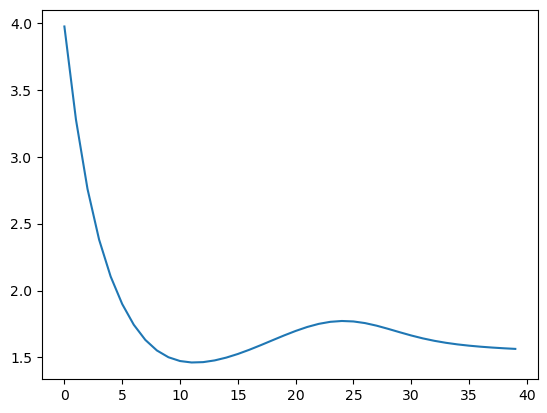

In [19]:
plt.plot(range(epochs), errors, label='line')
plt.show()

In [95]:
errors[-1]

1.563373575827829

In [126]:
x = f(X_test_scaled.T)

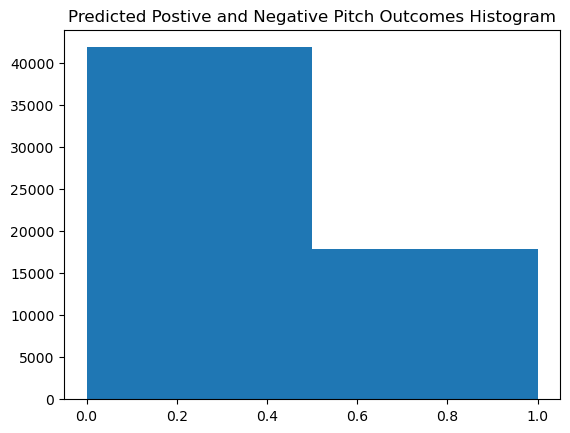

In [127]:
plt.hist(np.round(x)[0], bins=2)
plt.title('Predicted Postive and Negative Pitch Outcomes Histogram')
plt.show()

0.41305904252780296
0.5825634134050058
0.4637137932765516


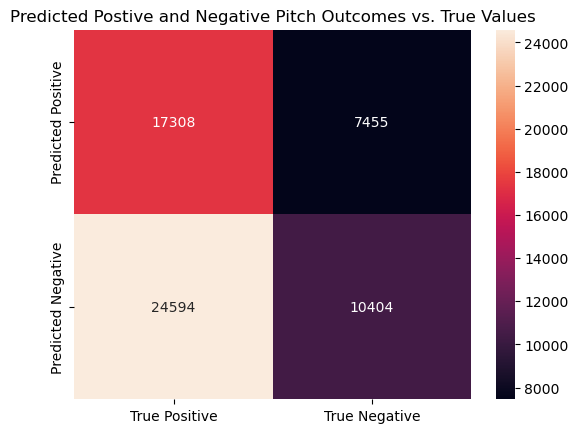

In [122]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

x = f(X_test_scaled.T)
c_matrix = confusion_matrix(y_test, np.round(x)[0])
sns.heatmap(c_matrix, annot=True,fmt='d', xticklabels=['True Positive', 'True Negative'], yticklabels=['Predicted Positive', 'Predicted Negative'])
plt.title('Predicted Postive and Negative Pitch Outcomes vs. True Values')
plt.savefig('heatmap_mlp.png')

print(c_matrix[0][0]/(c_matrix[0][0]+c_matrix[1][0]))
print(c_matrix[1][1]/(c_matrix[0][1]+c_matrix[1][1]))
print((c_matrix[1][1]+c_matrix[0][0])/(c_matrix[1][0]+c_matrix[0][0]+c_matrix[0][1]+c_matrix[1][1]))

0.4144547061389078
0.5854037267080745
0.5136429482258547


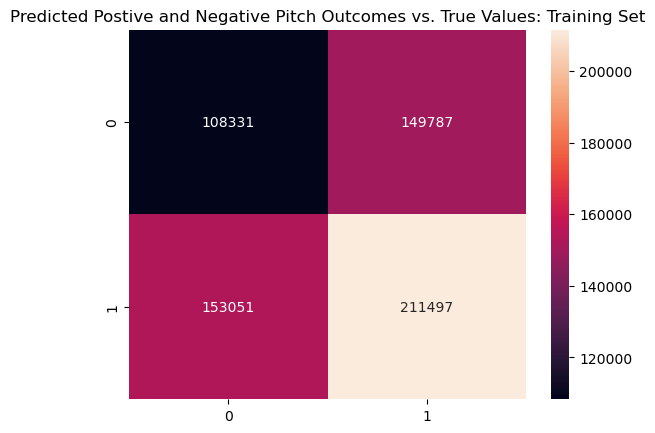

In [124]:
x = f(X_train_scaled.T)
c_matrix = confusion_matrix(y_train, np.round(x)[0])
sns.heatmap(c_matrix, annot=True, fmt='d')
plt.title('Predicted Postive and Negative Pitch Outcomes vs. True Values: Training Set')

print(c_matrix[0][0]/(c_matrix[0][0]+c_matrix[1][0]))
print(c_matrix[1][1]/(c_matrix[0][1]+c_matrix[1][1]))
print((c_matrix[1][1]+c_matrix[0][0])/(c_matrix[1][0]+c_matrix[0][0]+c_matrix[0][1]+c_matrix[1][1]))

In [23]:
X_test_scaled = np.column_stack((pitcher_test.to_numpy(), X_test_scaled))


In [113]:
    pitch_effectiveness = dict(zip(baseball_24.columns[34:50], [0]*len(baseball_24.columns[34:50])))
    for pitch in baseball_24.columns[34:50]:
        
        if pitch == 'CH':
            test = X_test_scaled[(X_test_scaled[:,35]==1)]
            x = np.round(f(test[:, 1:].T))[0]
            if len(x) > 100:
                pitch_effectiveness[pitch] = len(x[x==1])/len(x)
        elif pitch == 'CS':
            test = X_test_scaled[X_test_scaled[:,36]==1]
            x = np.round(f(test[:, 1:].T))[0]
            if len(x) > 100:
                pitch_effectiveness[pitch] = len(x[x==1])/len(x)
        elif pitch == 'CU':
            test = X_test_scaled[X_test_scaled[:,37]==1]
            x = np.round(f(test[:, 1:].T))[0]
            if len(x) > 100:
                pitch_effectiveness[pitch] = len(x[x==1])/len(x)
        elif pitch == 'EP':
            test = X_test_scaled[X_test_scaled[:,38]==1]
            x = np.round(f(test[:, 1:].T))[0]
            if len(x) > 100:
                pitch_effectiveness[pitch] = len(x[x==1])/len(x)
        elif pitch == 'FA':
            test = X_test_scaled[X_test_scaled[:,39]==1]
            x = np.round(f(test[:, 1:].T))[0]
            if len(x) > 100:
                pitch_effectiveness[pitch] = len(x[x==1])/len(x)
        elif pitch == 'FC':
            test = X_test_scaled[X_test_scaled[:,40]==1]
            x = np.round(f(test[:, 1:].T))[0]
            if len(x) > 100:
                pitch_effectiveness[pitch] = len(x[x==1])/len(x)
        elif pitch == 'FF':
            test = X_test_scaled[X_test_scaled[:,41]==1]
            x = np.round(f(test[:, 1:].T))[0]
            if len(x) > 100:
                pitch_effectiveness[pitch] = len(x[x==1])/len(x)
        elif pitch == 'FO':
            test = X_test_scaled[X_test_scaled[:,42]==1]
            x = np.round(f(test[:, 1:].T))[0]
            if len(x) > 100:
                pitch_effectiveness[pitch] = len(x[x==1])/len(x)
        elif pitch == 'FS':
            test = X_test_scaled[X_test_scaled[:,43]==1]
            x = np.round(f(test[:, 1:].T))[0]
            if len(x) > 100:
                pitch_effectiveness[pitch] = len(x[x==1])/len(x)
        elif pitch == 'KC':
            test = X_test_scaled[X_test_scaled[:,44]==1]
            x = np.round(f(test[:, 1:].T))[0]
            if len(x) > 100:
                pitch_effectiveness[pitch] = len(x[x==1])/len(x)
        elif pitch == 'KN':
            test = X_test_scaled[X_test_scaled[:,45]==1]
            x = np.round(f(test[:, 1:].T))[0]
            if len(x) > 100:
                pitch_effectiveness[pitch] = len(x[x==1])/len(x)
        elif pitch == 'SC':
            test = X_test_scaled[X_test_scaled[:,46]==1]
            x = np.round(f(test[:, 1:].T))[0]
            if len(x) > 100:
                pitch_effectiveness[pitch] = len(x[x==1])/len(x)
        elif pitch == 'SI':
            test = X_test_scaled[X_test_scaled[:,47]==1]
            x = np.round(f(test[:, 1:].T))[0]
            if len(x) > 100:
                pitch_effectiveness[pitch] = len(x[x==1])/len(x)
        elif pitch == 'SL':
            test = X_test_scaled[X_test_scaled[:,48]==1]
            x = np.round(f(test[:, 1:].T))[0]
            if len(x) > 100:
                pitch_effectiveness[pitch] = len(x[x==1])/len(x)
        if pitch == 'ST':
            test = X_test_scaled[X_test_scaled[:,49]==1]
            x = np.round(f(test[:, 1:].T))[0]
            if len(x) > 100:
                pitch_effectiveness[pitch] = len(x[x==1])/len(x)
        if pitch == 'SV':
            test = X_test_scaled[X_test_scaled[:,50]==1]
            x = np.round(f(test[:, 1:].T))[0]
            if len(x) > 100:
                pitch_effectiveness[pitch] = len(x[x==1])/len(x)

In [114]:
pitch_effectiveness = dict(sorted(pitch_effectiveness.items(),key=lambda x:x[1], reverse=True))

pop_keys = []
for key in pitch_effectiveness.keys():
    if key != 'FS':
        if pitch_effectiveness[key]==0:
            pop_keys.append(key)
for key in pop_keys:
    pitch_effectiveness.pop(key)

In [115]:
pitch_name_map = ['CH:Change-up', 'CU:Curveball', 'FC:Cutter', 'FF:Four Seam Fastball', 'FS:Splitter', 'KC:Knuckle Curve', 'SC:Screwball', 'SI:Sinker', 'SL:Slider','ST:Sweeper','SV:Slurve']

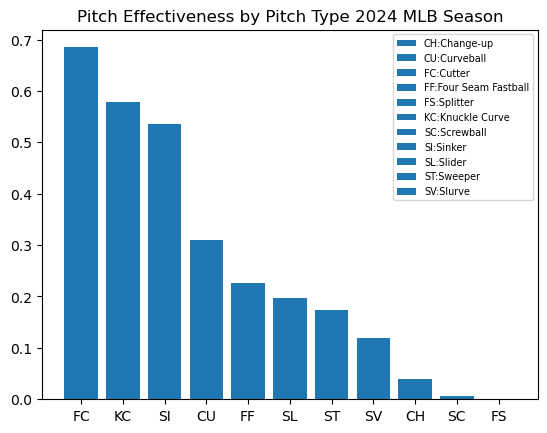

In [116]:
plt.bar(*zip(*pitch_effectiveness.items()), label=pitch_name_map)
plt.legend(fontsize='x-small')
plt.title('Pitch Effectiveness by Pitch Type 2024 MLB Season')
plt.savefig('pitch_effect.png')
plt.show()